In [9]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Reading in the onehot data frame
df = pd.read_json('../../src/data/combined_onehot.json')

In [11]:
from src.mymods import correlation_info

['SqFtTotLiving', 'SqFtOpenPorch']

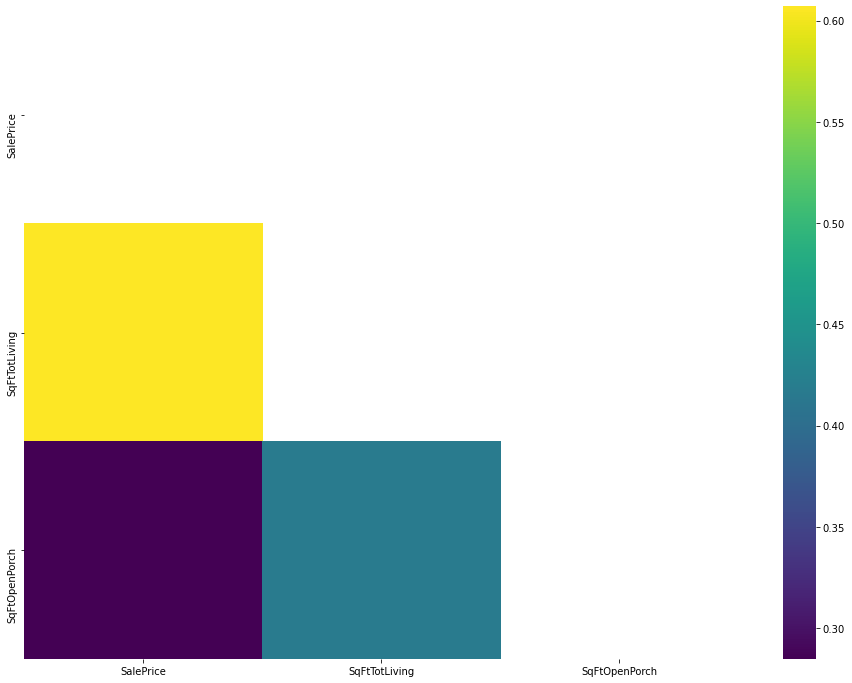

In [12]:
# determine top correlations for saleprice above .25
top_corr, graph = correlation_info(df, 'SalePrice',.25)
top_corr

In [13]:
from src.mymods import model_summary

In [14]:
# Looking at how the first model performed. Had a high r squared but lets see if it meets Linearity, Normality, Homoscadasticity.
summary, first_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          7.239e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:05:37   Log-Likelihood:                     -3.6678e+05
No. Observations:               25903   AIC:                                  7.336e+05
Df Residuals:                   25901   BIC:                                  7.336e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   341.7759      1.158    295.095      0.000     339.506     344.046
SqFtOpenPorch    40.4331     19.275      2.098      0.036       2.653      78.213
==============================================================================
Omnibus:                     5967.962   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25197.922
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       7.322   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

In [15]:
# With a 
rainbow_statistic, rainbow_p_value = linear_rainbow(first_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0018311308626158
Rainbow p-value: 0.4585475309371954


### Normality

jarque_bera: 25197.921791283563
jarque_bera: 0.0


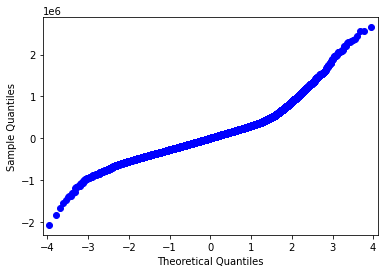

In [16]:
# The Prob(JB) is showing as 0 which mean it is currently violating the Normality assumption. 
#The QQ plot is showing this as well as it isnt a straight line and the left and right tails are curved. 
#This is telling us that the random error between our independent variables and dependent variables is fairly large. 
#One thng to improve this would be to take the outliers out of each predictors. 
jarque_bera = list(sms.jarque_bera(first_model.resid))[0]
Prob_JB =list(sms.jarque_bera(first_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

first_model_resids = first_model.resid
sm.qqplot(first_model_resids);


'''
The JB score has a low p-value means that the current model violates the
normality assumption. 
That supports the qq visual with the crooked tail.
'''

### Homoscadasticity

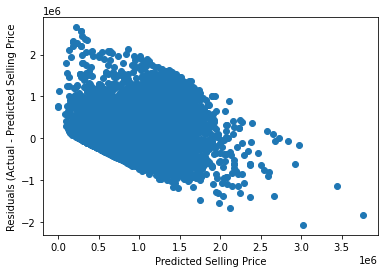

In [17]:
# A look at the Homoscadasticity tells us that our model is undervaluing cheaper sold homes and over valueing more expensive homes. 
# As the price increases the amount of outliers seem to increase as well.
y_hat = first_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, first_model_resids);

# Second Model

['SqFtTotLiving', 'SqFtOpenPorch', 'FinBasementGrade']

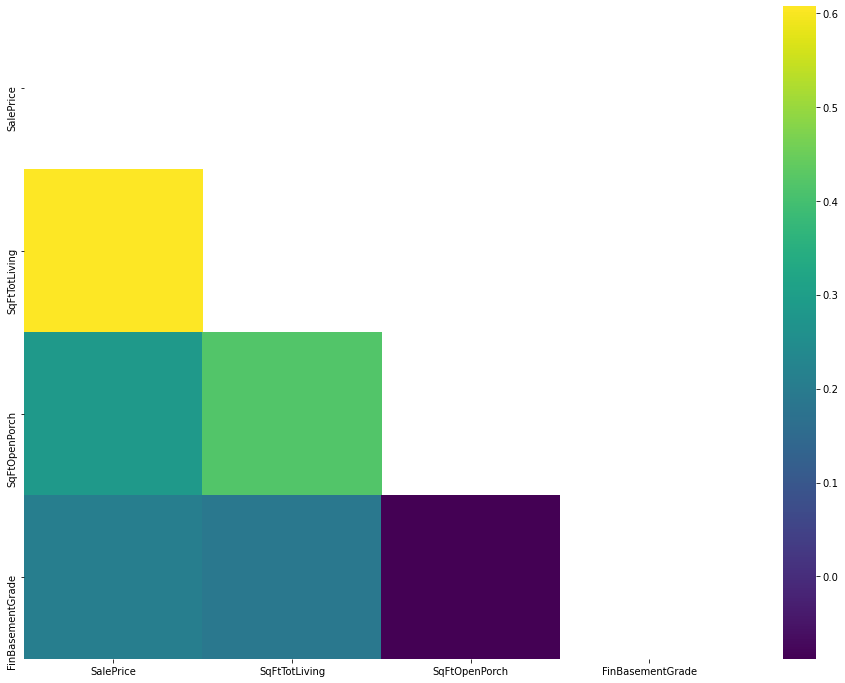

In [18]:
# Looking at the features that have a correlation above .2 with sale price
top_corr, graph = correlation_info(df, 'SalePrice',.2)
top_corr

In [19]:
# Look at how the second model performed compared to the first
summary, second_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                          4.953e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:05:39   Log-Likelihood:                     -3.6649e+05
No. Observations:               25903   AIC:                                  7.330e+05
Df Residuals:                   25900   BIC:                                  7.330e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SqFtTotLiving      320.1277      1.456    219.861      0.000     317.274     322.982
SqFtOpenPorch      136.3705     19.475      7.002      0.000      98.198     174.542
FinBasementGrade  1.448e+04    601.438     24.083      0.000    1.33e+04    1.57e+04
==============================================================================
Omnibus:                     6288.876   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27985.569
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       7.569   Cond. No.                         675.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

In [20]:
rainbow_statistic, rainbow_p_value = linear_rainbow(second_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0051454366610355
Rainbow p-value: 0.38513834754708215


### Normality 

In [21]:
jarque_bera = list(sms.jarque_bera(second_model.resid))[0]
Prob_JB =list(sms.jarque_bera(second_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

second_model_resids = second_model.resid
sm.qqplot(Second_model_resids);

jarque_bera: 27985.568670927853
jarque_bera: 0.0


NameError: name 'Second_model_resids' is not defined

### Homoscadasticity

NameError: name 'test_model_resids' is not defined

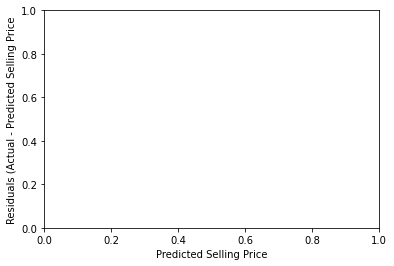

In [22]:
y_hat = second_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, test_model_resids);

### Independence

In [23]:
rows = df[top_corr].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df["feature"] = top_corr

vif_df

,VIF,feature
0,2.662698,SqFtTotLiving
1,1.719851,SqFtOpenPorch
2,1.747881,FinBasementGrade


# Third Model

['SqFtTotLiving',
 'SqFtOpenPorch',
 'FinBasementGrade',
 'WfntLocation_6.0',
 'WfntLocation_7.0',
 'WfntFootage']

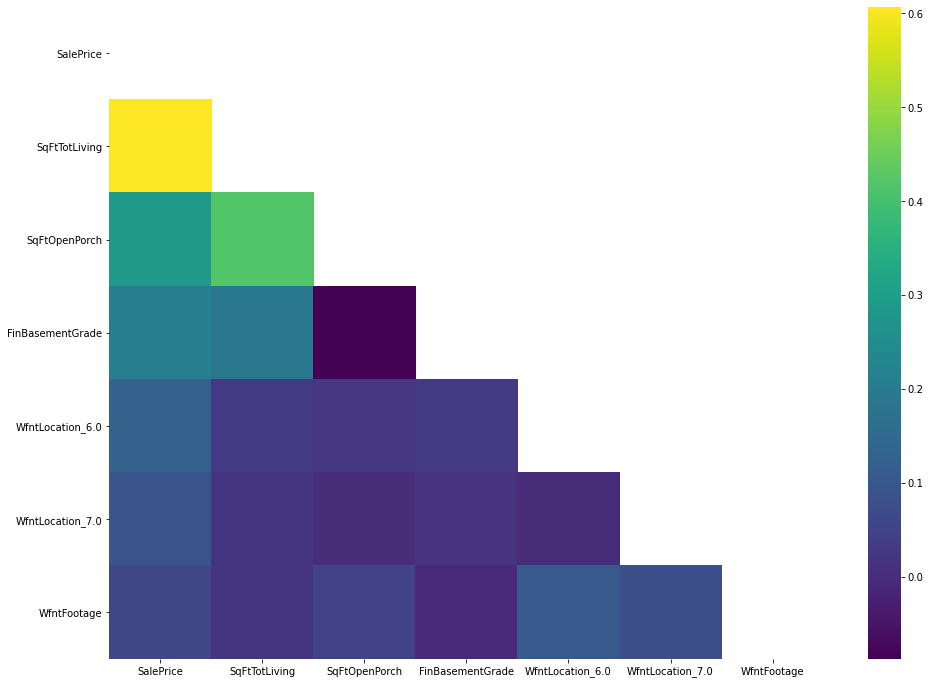

In [31]:
top_corr, graph = correlation_info(df, 'SalePrice',.05)
top_corr

In [32]:
summary, third_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                          2.567e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:06:04   Log-Likelihood:                     -3.6609e+05
No. Observations:               25903   AIC:                                  7.322e+05
Df Residuals:                   25897   BIC:                                  7.322e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SqFtTotLiving      319.2251      1.435    222.534      0.000     316.413     322.037
SqFtOpenPorch      126.0904     19.201      6.567      0.000      88.455     163.725
FinBasementGrade  1.405e+04    592.579     23.712      0.000    1.29e+04    1.52e+04
WfntLocation_6.0  9.834e+05   4.64e+04     21.175      0.000    8.92e+05    1.07e+06
WfntLocation_7.0  1.218e+06   7.46e+04     16.319      0.000    1.07e+06    1.36e+06
WfntFootage        619.5538     96.773      6.402      0.000     429.873     809.234
==============================================================================
Omnibus:                     5794.978   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25361.780
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       7.382   Cond. No.                     8.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

In [33]:
rainbow_statistic, rainbow_p_value = linear_rainbow(third_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0022193791939762
Rainbow p-value: 0.44981480670667473


### Normality 

jarque_bera: 25361.78022833417
jarque_bera: 0.0


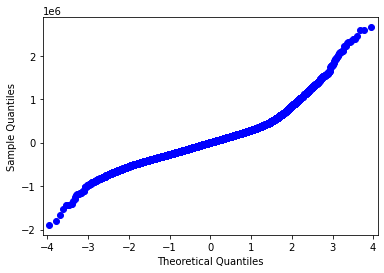

In [34]:
jarque_bera = list(sms.jarque_bera(third_model.resid))[0]
Prob_JB =list(sms.jarque_bera(third_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

third_model_resids = third_model.resid
sm.qqplot(third_model_resids);

### Homoscadasticity

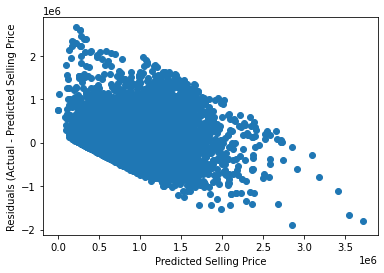

In [35]:
y_hat = third_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, third_model_resids);

### Independence

In [36]:
rows = df[top_corr].values

In [37]:
rows = df[top_corr].values

vif_df_third = pd.DataFrame()
vif_df_third["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df_third["feature"] = top_corr

vif_df_third

,VIF,feature
0,2.664695,SqFtTotLiving
1,1.723691,SqFtOpenPorch
2,1.749431,FinBasementGrade
3,1.014608,WfntLocation_6.0
4,1.007768,WfntLocation_7.0
5,1.023735,WfntFootage
